## Program to Predict Air Cargo Discharged in Singapore using RNN

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/pui-user/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Assigning a random seed for reproducability
np.random.seed(666)

In [3]:
# Loading the File
dataframe = pd.read_csv('total-air-cargo-discharged-in-tonnes.csv', \
                        usecols=[1], engine='python', skipfooter=3)

In [4]:
#Converting to a Float datatype to convert to Numpy Array
dataset = dataframe.values
dataset = dataset.astype('float32')

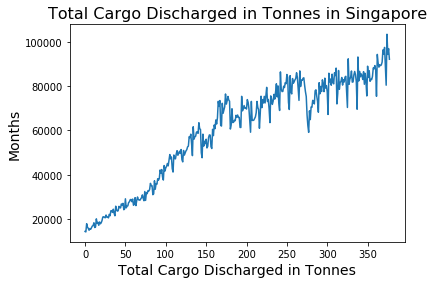

In [5]:
plt.plot(dataset)
plt.xlabel('Total Cargo Discharged in Tonnes', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Total Cargo Discharged in Tonnes in Singapore', fontsize = 16)
plt.show()

### Fig.1: This figure shows the overall Air Cargo Discharged in Singapore in tonnes as a function of months.

In [6]:
# Assigning Range
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
#Dividing Training and Test Sample
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print ("train_data_size: " + str(len(train)), " test_data_size: "+str(len(test)))

train_data_size: 253  test_data_size: 125


In [8]:
#Function to Create Nump Dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# Assigning X to t and Y to t+!
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# Reshaping the Array
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [11]:
#Creating the LSTM model and fitting to it
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

/home/pui-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pui-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pui-user/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 2s - loss: 0.0637
Epoch 2/100
 - 1s - loss: 0.0192
Epoch 3/100
 - 1s - loss: 0.0127
Epoch 4/100
 - 1s - loss: 0.0072
Epoch 5/100
 - 1s - loss: 0.0038
Epoch 6/100
 - 1s - loss: 0.0024
Epoch 7/100
 - 1s - loss: 0.0020
Epoch 8/100
 - 1s - loss: 0.0020
Epoch 9/100
 - 1s - loss: 0.0019
Epoch 10/100
 - 1s - loss: 0.0019
Epoch 11/100
 - 1s - loss: 0.0020
Epoch 12/100
 - 1s - loss: 0.0019
Epoch 13/100
 - 1s - loss: 0.0019
Epoch 14/100
 - 1s - loss: 0.0020
Epoch 15/100
 - 1s - loss: 0.0019
Epoch 16/100
 - 1s - loss: 0.0019
Epoch 17/100
 - 1s - loss: 0.0020
Epoch 18/100
 - 1s - loss: 0.0019
Epoch 19/100
 - 1s - loss: 0.0019
Epoch 20/100
 - 1s - loss: 0.0019
Epoch 21/100
 - 1s - loss: 0.0019
Epoch 22/100
 - 1s - loss: 0.0019
Epoch 23/100
 - 1s - loss: 0.0020
Epoch 24/100
 - 1s - loss: 0.0018
Epoch 25/100
 - 1s - loss: 0.0019
Epoch 26/100
 - 1s - loss: 0.0019
Epoch 27/100
 - 1s - loss: 0.0019
Epoch 28/100
 - 1s - loss: 0.0019
Epoch 29/100
 - 1s - loss: 0.0019
Epoch 30/100
 - 1s - lo

In [12]:
#Creating PRediction Results
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
#Inverting the Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

[ 14160.00029626  17874.00020595  16329.00030049  15779.00064418
  14919.00014131  15670.00051391  15352.00019491  16052.00060422
  16798.00064125  17035.99958289  18289.00011597  16132.99991976
  16391.99947244  20063.00022187  18021.0004915   18491.00010103
  17148.99944938  18649.99959524  17816.00003898  18267.00023617
  19264.9996222   20893.00004191  21020.99958452  20745.99975636
  20540.00003508  21777.00029269  20825.99980314  20874.99989832
  20489.99934056  22079.99960498  21466.99944613  23711.00049215
  23743.00104309  22971.99932821  24413.00076957  22606.00084396
  21455.00023747  25775.00010233  24191.998711    23556.00073416
  23704.99955723  25711.99959979  25112.9998483   25007.00018549
  26795.99996752  26217.99949648  27063.00032323  24191.998711
  24526.99990482  29115.00072474  25031.99920217  25741.00101386
  25954.00093882  27461.99995777  27775.99920997  28744.9998431
  28806.99974629  27813.00009648  28992.99945588  26203.00115094
  26700.00097585  29631.9992

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4041.16 RMSE
Test Score: 7713.78 RMSE


In [16]:
# Shift Dataset to Plot
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [17]:
#Shift Prediction to plot
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

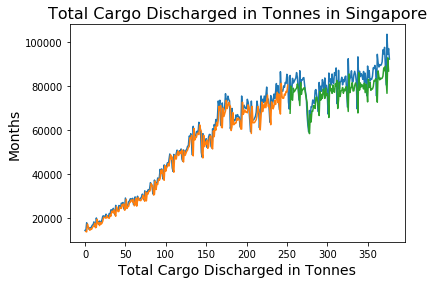

In [18]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Total Cargo Discharged in Tonnes', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Total Cargo Discharged in Tonnes in Singapore', fontsize = 16)
plt.show()


### Fig.2: This figure shows the actual and predicted values of total air cargo Discharged in Singapore based on the model. The plot in Blue is the actual value, the plot in orange is for the training data and the plot in Green is for the Prediction data